# Importing the libraries 

In [2]:
import os
import pandas
import numpy
import sklearn.ensemble as ek
#from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
#from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import  tree, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Importing the dataset

In [4]:
dataset = pandas.read_csv("C:/Users/bushr/Downloads/data.csv",sep='|', low_memory=False)

In [5]:
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,VirusShare_dd619efac1cea076816815b2f6220a6d,dd619efac1cea076816815b2f6220a6d,332,224,271,6,0,40960,32768,0,...,6,3.322505,2.370859,3.906893,401.666667,34,848,0,20,0
10535,VirusShare_c93fb2f6ef3a92dc0a0d33fc3f8668a9,c93fb2f6ef3a92dc0a0d33fc3f8668a9,332,224,258,14,11,286720,1044992,0,...,31,4.041140,1.073946,7.544784,26745.612903,118,406584,152,16,0
10536,VirusShare_622e962ebf6da7ac26aee84873682bce,622e962ebf6da7ac26aee84873682bce,332,224,8450,9,0,89600,55808,0,...,50,2.488268,0.960953,5.020695,257.640000,20,1254,72,16,0
10537,VirusShare_70111012bb702b4cc13c52f7ceb3df91,70111012bb702b4cc13c52f7ceb3df91,332,224,271,6,0,24576,141824,2048,...,15,1.933714,0.000000,5.269173,1210.666667,104,4264,0,0,0


In [7]:
dataset.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [8]:
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1


# Data Summary

In [24]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


# Exploratory Analysis

# Univariate analysis 

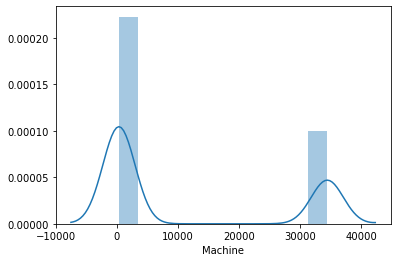

In [9]:
import seaborn as sns

sns.distplot(dataset['Machine'])

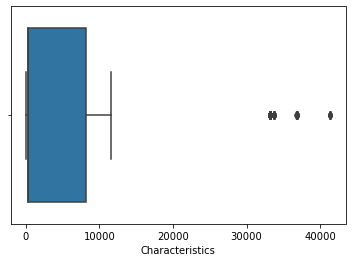

In [10]:
sns.boxplot(dataset['Characteristics'])

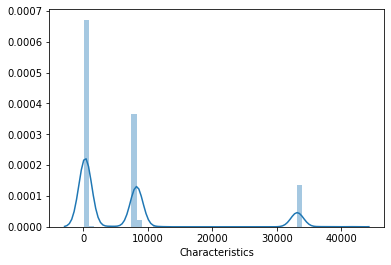

In [11]:
import seaborn as sns

sns.distplot(dataset['Characteristics'])

# Multivariate analysis

In [12]:
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,VirusShare_dd619efac1cea076816815b2f6220a6d,dd619efac1cea076816815b2f6220a6d,332,224,271,6,0,40960,32768,0,...,6,3.322505,2.370859,3.906893,401.666667,34,848,0,20,0
10535,VirusShare_c93fb2f6ef3a92dc0a0d33fc3f8668a9,c93fb2f6ef3a92dc0a0d33fc3f8668a9,332,224,258,14,11,286720,1044992,0,...,31,4.041140,1.073946,7.544784,26745.612903,118,406584,152,16,0
10536,VirusShare_622e962ebf6da7ac26aee84873682bce,622e962ebf6da7ac26aee84873682bce,332,224,8450,9,0,89600,55808,0,...,50,2.488268,0.960953,5.020695,257.640000,20,1254,72,16,0
10537,VirusShare_70111012bb702b4cc13c52f7ceb3df91,70111012bb702b4cc13c52f7ceb3df91,332,224,271,6,0,24576,141824,2048,...,15,1.933714,0.000000,5.269173,1210.666667,104,4264,0,0,0


In [13]:
dataset.shape

(10539, 57)

In [14]:
v=dataset.corr()

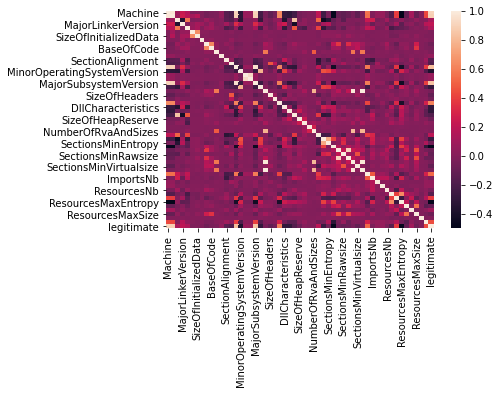

In [15]:
sns.heatmap(v)

In [16]:
import pylab as plt

c=numpy.asarray(dataset['SizeOfCode'])
b=numpy.asarray(dataset['SizeOfInitializedData'])

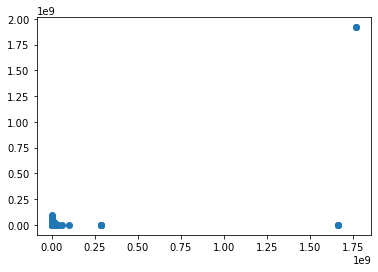

In [17]:
plt.scatter(c,b)

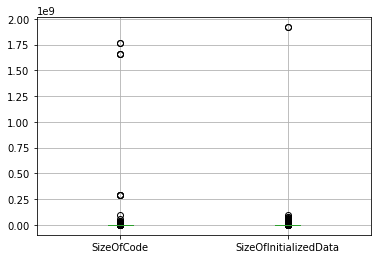

In [18]:
dataset.boxplot(column=['SizeOfCode','SizeOfInitializedData'])

In [19]:
dataset.groupby(dataset['legitimate']).size()

legitimate
0    6999
1    3540
dtype: int64

In [20]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values

In [21]:

import sklearn
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X, y ,test_size=0.2)

# Model building

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [24]:
logisticRegr.fit(X_train, y_train)

C:\Users\bushr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model evaluation

In [25]:
score = logisticRegr.score(X_test,y_test)
print ("%s : %s " %('logits', score))

logits : 0.9535104364326376 


In [26]:
res = logisticRegr.predict(X_test)
mt = confusion_matrix(y_test, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.709220 %
False negative rate : 12.607450 %


# ExtraTreesClassifier
ExtraTreesClassifier fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

In [27]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

ExtraTreesClassifier helps in selecting the required features useful for classifying a file as either Malicious or Legitimate

14 features are identified as required by ExtraTreesClassifier

In [28]:
nbfeatures

10

#  Cross Validation
Cross validation is applied to divide the dataset into random train and test subsets.
test_size = 0.2 represent the proportion of the dataset to include in the test split 

In [29]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

In [30]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

1. feature Machine (0.274956)
2. feature MajorOperatingSystemVersion (0.127888)
3. feature MajorSubsystemVersion (0.092764)
4. feature SizeOfOptionalHeader (0.066613)
5. feature DllCharacteristics (0.051281)
6. feature Characteristics (0.046266)
7. feature ResourcesMaxEntropy (0.034206)
8. feature VersionInformationSize (0.033469)
9. feature LoadConfigurationSize (0.031633)
10. feature ImageBase (0.026314)


# Building the below Machine Learning model

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()   
}

# Training each of the model with the X_train and testing with X_test.
The model with best accuracy will be ranked as winner

In [32]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9786527514231499 
RandomForest : 0.9838709677419355 
Adaboost : 0.9767552182163188 
GradientBoosting : 0.9800759013282733 
GNB : 0.3681214421252372 
LinearRegression : -104.8373308992595 


In [33]:
X_train.shape

(8431, 54)

In [34]:
winner = max(results, key=results.get)

In [35]:
winner

'RandomForest'

In [36]:
clf = model[winner]
res = clf.predict(X)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.157165 %
False negative rate : 0.706215 %


In [41]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [45]:
import pickle
import joblib

In [46]:
joblib.dump(model[winner],'classifier.pkl')

['classifier.pkl']

In [47]:
open('features.pkl', 'wb').write(pickle.dumps(features))

207

# So ensembling is the best way to find the malware analysis 

# Model Deployement for Real time Binary file

In [48]:
open('features.pkl', 'wb').write(pickle.dumps(features))

207

In [49]:
# Load classifier
clf = joblib.load('classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('features.pkl'),'rb').read())

In [50]:
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode']

In [68]:
import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse



def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
  	    occurences[x if isinstance(x, int) else ord(x)] += 1

    entropy = 0
    for x in occurences:
	    if x:
	        p_x = float(x) / len(data)
	        entropy -= p_x*math.log(p_x, 2)

    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
          res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
          res['os'] = pe.VS_FIXEDFILEINFO.FileOS
          res['type'] = pe.VS_FIXEDFILEINFO.FileType
          res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
          res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
          res['signature'] = pe.VS_FIXEDFILEINFO.Signature
          res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res

#extract the info for a given file
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = map(lambda x:x.get_entropy(), pe.sections)
    entropy=list(entropy)
    nmk=float(len(entropy))
    res['SectionsMeanEntropy'] = sum(entropy)/nmk
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = map(lambda x:x.SizeOfRawData, pe.sections)
    raw_sizes=list(raw_sizes)
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = map(lambda x:x.Misc_VirtualSize, pe.sections)
    virtual_sizes=list(virtual_sizes)
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = map(lambda x:x[0], resources)
        entropy=list(entropy)
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = map(lambda x:x[1], resources)
        sizes=list(sizes)
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res




   




In [72]:
import numpy
clf = joblib.load('classifier.pkl')
features = pickle.loads(open('features.pkl','rb').read())
## Give path for the file name appended
data = extract_infos("C:/Users/bushr/Downloads/filmora_setup_full846 (1).exe")


import pandas as pd
df=pd.Series(data)
jk=numpy.asarray(df)
jk=jk.reshape(1, -1)
res= clf.predict(jk) 
print(res)
print ('The file  is %s' %(['malicious', 'legitimate'][res[0]]))





[0]
The file  is malicious
